In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional visualization style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Load the dataset
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Market Segment Analysis Kum.xlsx'
# Column names based on the file layout (Header at Row 2)
cols = ['Segment', 'Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']
df_market = pd.read_excel(file_path, skiprows=3, names=cols)

print("Libraries loaded and Market Segment data for Kumarakom imported.")

Libraries loaded and Market Segment data for Kumarakom imported.


In [2]:
# 1. Basic Cleaning: Remove rows with missing segment names or summary text
df_market = df_market.dropna(subset=['Segment'])
df_market = df_market[~df_market['Segment'].str.contains('Total|Grand Total|Contribution Analysis', case=False, na=False)]

# 2. Convert numeric columns to float/int
numeric_cols = ['Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']
for col in numeric_cols:
    df_market[col] = pd.to_numeric(df_market[col], errors='coerce').fillna(0)

# 3. Filter for segments that generated business
df_active = df_market[df_market['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active market segments for visualization.")
df_active.head()

Cleaned 7 active market segments for visualization.


,Segment,Nights,Occ_Pct,Pax,Room_Revenue,Revenue_Pct,ADR,ARP
1,FTH - Holiday Home,42,3.58,89,221037.50,2.60,5262.7976,2483.5674
3,WED - Weddings,25,2.13,54,116525.25,1.37,4661.0100,2157.8750
4,Corporates,72,6.14,155,394901.85,4.64,5484.7479,2547.7539
5,Travel Agents,572,48.81,1220,3836786.71,45.08,6707.6691,3144.9071
6,DFIT,58,4.95,154,559035.32,6.57,9638.5400,3630.0995


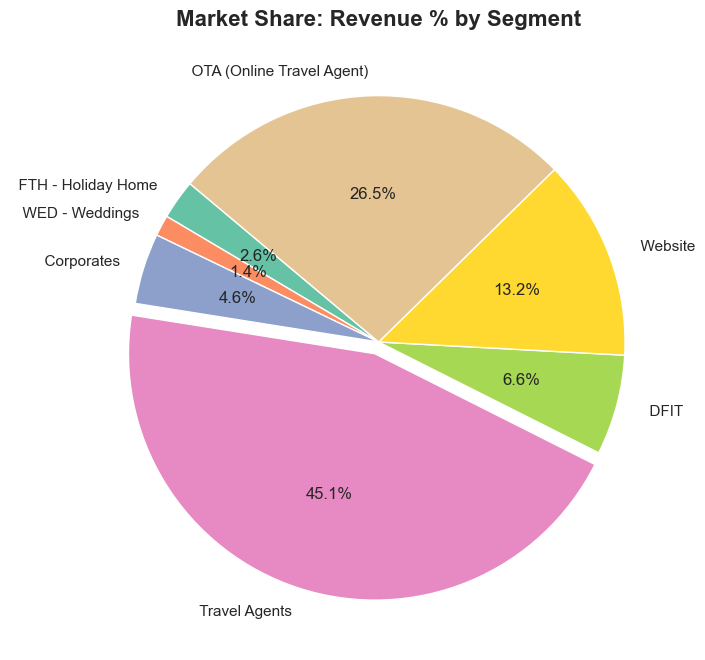

In [ ]:
# Using a Pie Chart to see which segment "owns" the market
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2")

plt.pie(df_active['Room_Revenue'], 
        labels=df_active['Segment'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=[0.05 if x == df_active['Room_Revenue'].max() else 0 for x in df_active['Room_Revenue']])

plt.title('Market Share: Revenue % by Segment', fontsize=16, fontweight='bold')
plt.show()

#### --- INSIGHT ---
#### 1. TRAVEL AGENTS: Notice the massive contribution of Travel Agents (~45%), which is typical for leisure destinations like Kumarakom.
#### 2. OTA IMPACT: OTAs contribute roughly 25% of the revenue.

C:\Users\SC\AppData\Local\Temp\ipykernel_20268\3121499132.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Segment', y='Room_Revenue', ax=ax1, palette='Blues_d')


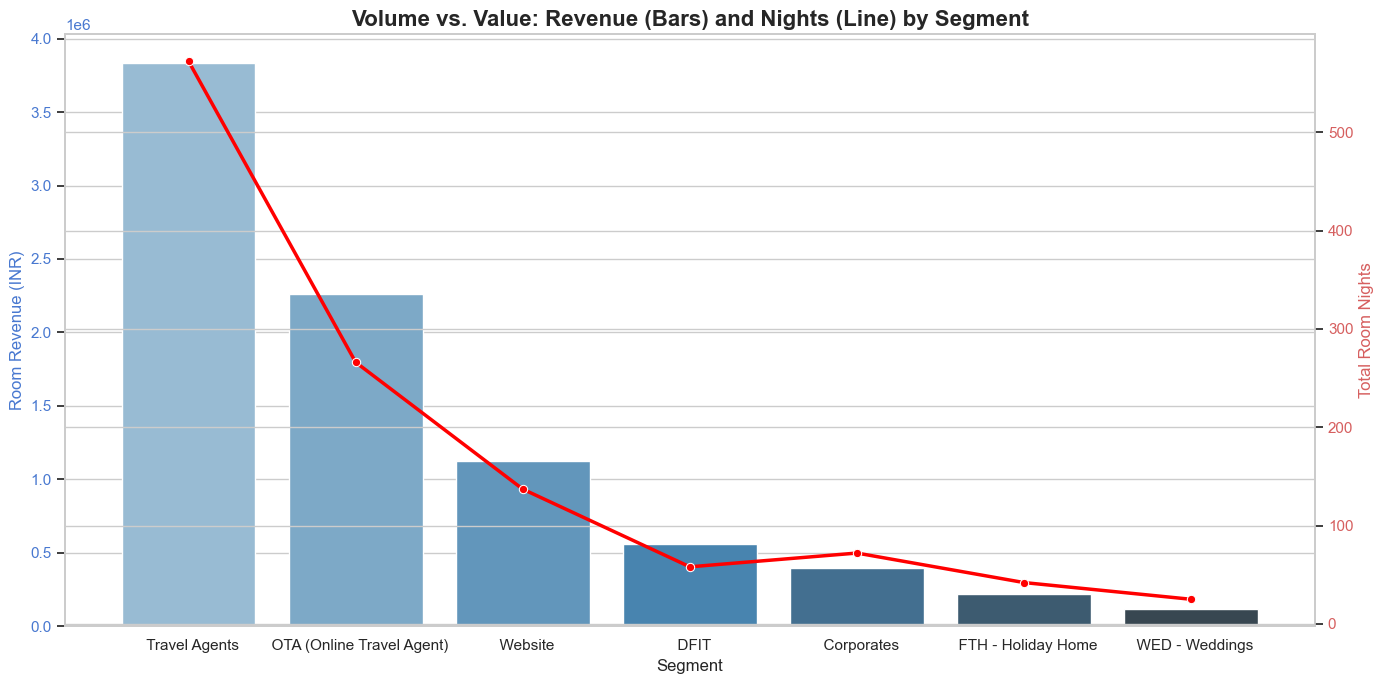

In [4]:
# Comparing Volume (Nights) vs. Value (Revenue)
df_sorted = df_active.sort_values('Room_Revenue', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar for Revenue
sns.barplot(data=df_sorted, x='Segment', y='Room_Revenue', ax=ax1, palette='Blues_d')
ax1.set_ylabel('Room Revenue (INR)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Line for Nights
ax2 = ax1.twinx()
sns.lineplot(data=df_sorted, x='Segment', y='Nights', ax=ax2, color='red', marker='o', linewidth=2.5)
ax2.set_ylabel('Total Room Nights', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Volume vs. Value: Revenue (Bars) and Nights (Line) by Segment', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### --- INSIGHT ---
#### 1. PRODUCTIVITY: Where the red line (Nights) is low but the bar (Revenue) is high, the segment is highly profitable (e.g., DFIT).
#### 2. BULK BUSINESS: Where the red line is high, the segment is filling the hotel (e.g., Travel Agents).

C:\Users\SC\AppData\Local\Temp\ipykernel_20268\2966841914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_yield, x='ADR', y='Segment', palette='magma')


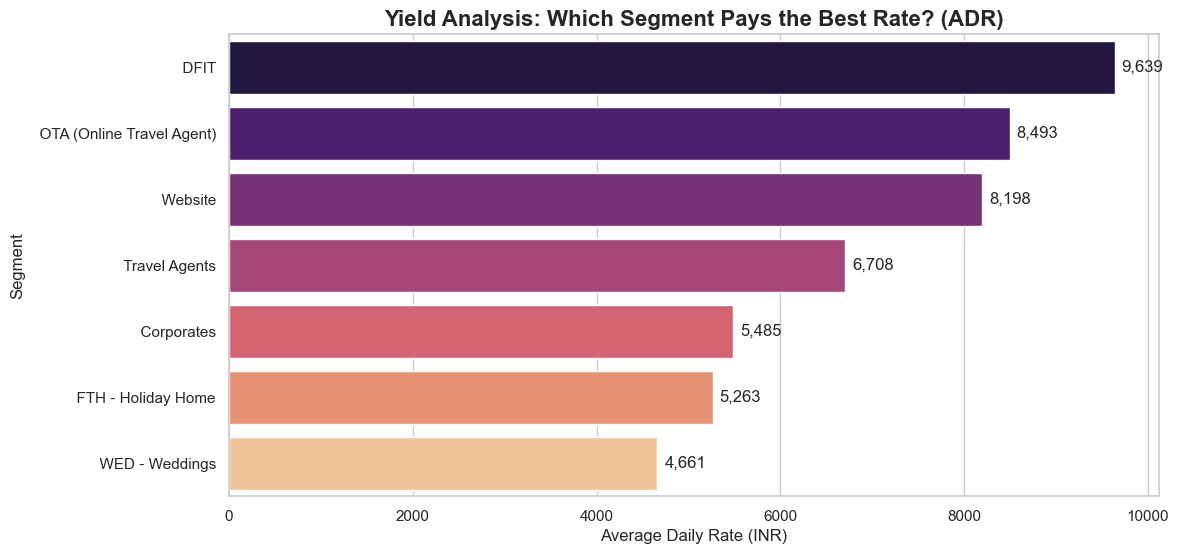

In [5]:
# Sorting by ADR to see who pays the most per night
df_yield = df_active.sort_values('ADR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_yield, x='ADR', y='Segment', palette='magma')

plt.title('Yield Analysis: Which Segment Pays the Best Rate? (ADR)', fontsize=16, fontweight='bold')
plt.xlabel('Average Daily Rate (INR)', fontsize=12)

# Labeling bars
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=5)

plt.show()

#### --- INSIGHT ---
#### 1. DIRECT FIT: DFIT (Direct FIT) usually has the highest ADR (~9,638 INR), meaning these are your most profitable individual guests.
#### 2. WEBSITE: Your own website captures high rates (~8,197 INR), which is excellent as it bypasses third-party commissions.

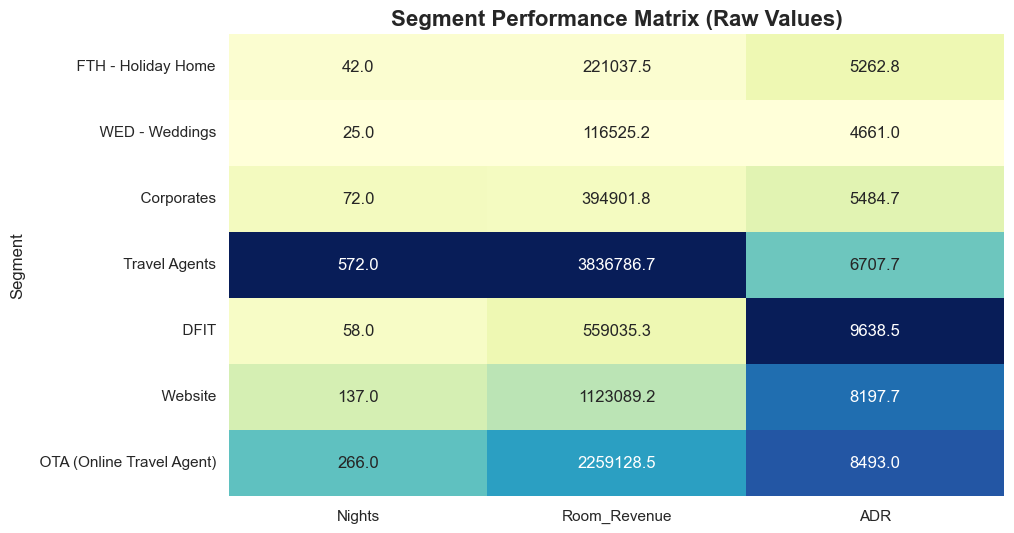

In [6]:
# Heatmap showing three key metrics at once
heatmap_data = df_active.set_index('Segment')[['Nights', 'Room_Revenue', 'ADR']]
# Scale data for better color distribution in heatmap
heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_norm, annot=heatmap_data, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title('Segment Performance Matrix (Raw Values)', fontsize=16, fontweight='bold')
plt.show()

In [7]:
# Create summary table for stakeholders
summary = df_active[['Segment', 'Nights', 'Room_Revenue', 'ADR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Kumarakom_Market_Segment_Summary.csv', index=False)

print("Analysis Complete. Final Ranking of Segments by Revenue:")
summary

Analysis Complete. Final Ranking of Segments by Revenue:


,Segment,Nights,Room_Revenue,ADR,Revenue_Pct
5,Travel Agents,572,3836786.71,6707.6691,45.08
8,OTA (Online Travel Agent),266,2259128.48,8492.9642,26.55
7,Website,137,1123089.19,8197.7313,13.20
6,DFIT,58,559035.32,9638.5400,6.57
4,Corporates,72,394901.85,5484.7479,4.64
1,FTH - Holiday Home,42,221037.50,5262.7976,2.60
3,WED - Weddings,25,116525.25,4661.0100,1.37


#### Key Insights for Rhythm Kumarakom (Market Segment):
#### 1. The Agency Engine: Travel Agents are the primary business driver, contributing nearly 45% of your total room revenue and nearly half of all room nights (572 nights).

#### 2. Yield Winner: DFIT (Direct FIT) guests are your "Golden Guests." They pay the highest rate (9,638 INR ADR), which is significantly higher than the average Travel Agent rate (~6,707 INR).

#### 3. Direct Growth: The Website segment is healthy, contributing over 1.1M INR at a strong ADR. This is a high-margin channel that should be prioritized for marketing spend.

#### 4. Volume Anchors: While Corporates provide lower volume than agents, they maintain a stable ADR (~5,484 INR), helping to fill the property during off-peak times.